<a href="https://colab.research.google.com/github/tasdid25/Deep-Learning/blob/main/Class_04_Training_Deep_Learning_Models_%5BPytorch%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Train Fashion MNIST data with the pytorch

100%|██████████| 26421880/26421880 [00:11<00:00, 2341337.20it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 204267.83it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1026190.50it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7675889.44it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



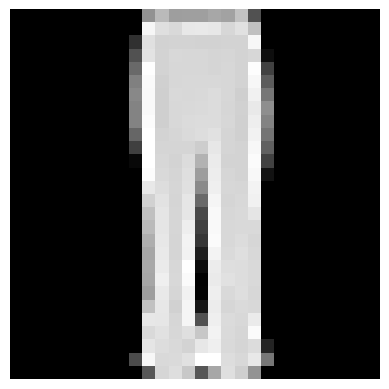

Label: Trouser
Epoch [1/10], Training Loss: 0.8274, Validation Loss: 0.5328
Epoch [2/10], Training Loss: 0.6086, Validation Loss: 0.4640
Epoch [3/10], Training Loss: 0.5703, Validation Loss: 0.4790
Epoch [4/10], Training Loss: 0.5557, Validation Loss: 0.4429
Epoch [5/10], Training Loss: 0.5473, Validation Loss: 0.4619
Epoch [6/10], Training Loss: 0.5390, Validation Loss: 0.4537
Epoch [7/10], Training Loss: 0.5334, Validation Loss: 0.4286
Epoch [8/10], Training Loss: 0.5279, Validation Loss: 0.4662
Epoch [9/10], Training Loss: 0.5267, Validation Loss: 0.4291
Epoch [10/10], Training Loss: 0.5218, Validation Loss: 0.4345
Early stopping!


<ipython-input-1-aa80b419b8e1>:147: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('best_model.pth'))


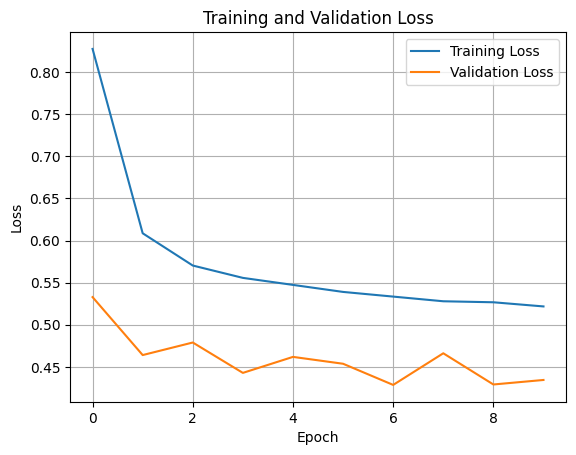

Overall Accuracy on the test set: 84.29%

Accuracy of T-shirt/top: 82.30%
Accuracy of    Trouser: 95.80%
Accuracy of   Pullover: 65.70%
Accuracy of      Dress: 88.80%
Accuracy of       Coat: 86.20%
Accuracy of     Sandal: 92.80%
Accuracy of      Shirt: 52.50%
Accuracy of    Sneaker: 91.70%
Accuracy of        Bag: 95.70%
Accuracy of Ankle boot: 91.40%


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Data Import, Preparation, and Preprocessing

# Define transformations for the training and testing sets
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data to [-1, 1]
])

# Download and load the training data
trainset = torchvision.datasets.FashionMNIST(
    root='./data',        # Directory to store the dataset
    train=True,           # Specifies training set
    download=True,        # Downloads the dataset if not already present
    transform=transform   # Applies the transformations
)
trainloader = torch.utils.data.DataLoader(
    trainset,             # Dataset to load
    batch_size=64,        # Number of samples per batch
    shuffle=True          # Shuffle the data at every epoch
)

# Download and load the testing data
testset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,          # Specifies test set
    download=True,
    transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False         # No need to shuffle test data
)

# Understanding the Data
# Map numeric labels to class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.squeeze(npimg), cmap='gray')
    plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show one image
imshow(images[0])
print('Label:', classes[labels[0]])

# Defining the Neural Network with Dropout

class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.5)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 10)  # 10 output classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the images
        x = self.dropout1(self.relu1(self.fc1(x)))
        x = self.dropout2(self.relu2(self.fc2(x)))
        x = self.dropout3(self.relu3(self.fc3(x)))
        x = self.fc4(x)  # Output layer (no activation, will use CrossEntropyLoss)
        return x

# Initialize the network with dropout
net = NetWithDropout()

# Choosing Loss Function and Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)

# Training Parameters and Variables

num_epochs = 10
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 3  # Early stopping patience
trigger_times = 0

# Training Loop with Early Stopping

for epoch in range(num_epochs):
    net.train()  # Set the model to training mode
    running_train_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()          # Zero the parameter gradients
        outputs = net(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                # Backward pass
        optimizer.step()               # Update weights
        running_train_loss += loss.item()
    train_loss = running_train_loss / len(trainloader)
    train_losses.append(train_loss)

    net.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    val_loss = running_val_loss / len(testloader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        # Save the model checkpoint
        torch.save(net.state_dict(), 'best_model.pth')
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print('Early stopping!')
            break

# 6. Loading the Best Model

net.load_state_dict(torch.load('best_model.pth'))

# 7. Plotting the Losses

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 8. Evaluating the Final Model

def evaluate_network():
    net.eval()
    correct = 0
    total = 0
    class_correct = [0] * 10
    class_total = [0] * 10
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Per-class accuracy
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    print(f'Overall Accuracy on the test set: {100 * correct / total:.2f}%\n')
    # Print accuracy for each class
    for i in range(10):
        if class_total[i] > 0:
            print(f'Accuracy of {classes[i]:>10s}: {100 * class_correct[i] / class_total[i]:.2f}%')
        else:
            print(f'Accuracy of {classes[i]:>10s}: N/A (no samples)')

# Call the evaluation function
evaluate_network()


## Create the scnario of the Exployding Gradient Decent & Implement Gradient clipping


Training without Gradient Clipping
Epoch [1/5], Loss: nan
Epoch [2/5], Loss: nan
Epoch [3/5], Loss: nan
Epoch [4/5], Loss: nan
Epoch [5/5], Loss: nan
Finished Training without Clipping


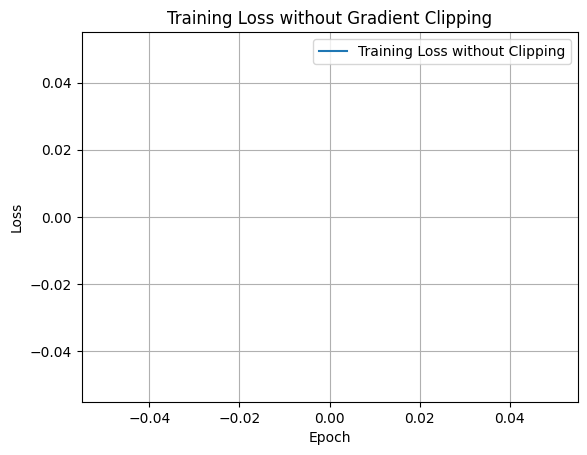


Training with Gradient Clipping
Epoch [1/5], Loss: 0.8043
Epoch [2/5], Loss: 0.5042
Epoch [3/5], Loss: 0.4460
Epoch [4/5], Loss: 0.4194
Epoch [5/5], Loss: 0.3956
Finished Training with Clipping


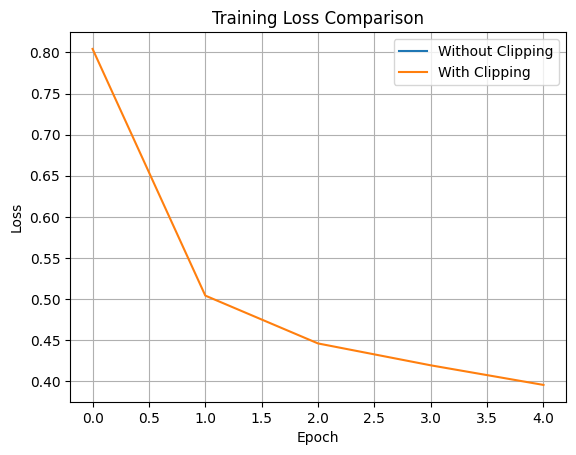


Evaluating model trained without gradient clipping (may fail due to NaNs):
Accuracy on the test set: 10.00%

Evaluating model trained with gradient clipping:
Accuracy on the test set: 83.84%


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Import, Preparation, and Preprocessing

# Define transformations for the training and testing sets
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data to [-1, 1]
])

# Download and load the training data
trainset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=64,
    shuffle=True
)

# Download and load the testing data
testset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False
)

# Map numeric labels to class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Defining the Neural Network

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(64, 10)  # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.fc5(x)
        return x

# 3. Demonstrating the Exploding Gradient Problem

def train_without_clipping(net, optimizer, criterion, num_epochs=5):
    print("\nTraining without Gradient Clipping")
    net.train()

    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    print('Finished Training without Clipping')
    return train_losses

# Initialize the network
net = SimpleNet()

# Define loss function and optimizer with a high learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1.0)  # High learning rate

# Train the network
losses_without_clipping = train_without_clipping(net, optimizer, criterion, num_epochs=5)

# Plot the training losses
plt.figure()
plt.plot(losses_without_clipping, label='Training Loss without Clipping')
plt.title('Training Loss without Gradient Clipping')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 5. Solving the Exploding Gradient Problem

def train_with_clipping(net, optimizer, criterion, clip_value=1.0, num_epochs=5):
    print("\nTraining with Gradient Clipping")
    net.train()

    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            # Apply gradient clipping
            torch.nn.utils.clip_grad_norm_(net.parameters(), clip_value)
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    print('Finished Training with Clipping')
    return train_losses

# Re-initialize the network
net_clipped = SimpleNet()

# Define loss function and optimizer with the same high learning rate
optimizer_clipped = optim.SGD(net_clipped.parameters(), lr=1.0)  # High learning rate

# Train the network with gradient clipping
losses_with_clipping = train_with_clipping(net_clipped, optimizer_clipped, criterion, clip_value=1.0, num_epochs=5)

# Plot the training losses
plt.figure()
plt.plot(losses_without_clipping, label='Without Clipping')
plt.plot(losses_with_clipping, label='With Clipping')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 7. Evaluating the Model Trained With Gradient Clipping

def evaluate_model(net):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

# Evaluate the model trained without clipping
print("\nEvaluating model trained without gradient clipping (may fail due to NaNs):")
evaluate_model(net)

# Evaluate the model trained with clipping
print("\nEvaluating model trained with gradient clipping:")
evaluate_model(net_clipped)


## Experiments with the Adam Optimizer

100%|██████████| 26421880/26421880 [00:08<00:00, 3009454.62it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 179406.11it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 937163.51it/s] 


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21965693.79it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Training with Optimizer (Adam)
Epoch [1/5], Loss: 0.5307
Epoch [2/5], Loss: 0.3821
Epoch [3/5], Loss: 0.3437
Epoch [4/5], Loss: 0.3148
Epoch [5/5], Loss: 0.2942
Finished Training with Optimizer (Adam)


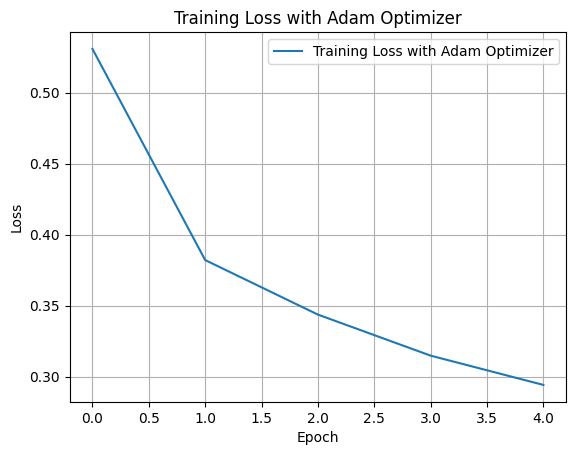


Evaluating model trained with Adam optimizer:
Accuracy on the test set: 86.83%


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Import, Preparation, and Preprocessing

# Define transformations for the training and testing sets
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data to [-1, 1]
])

# Download and load the training data
trainset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=64,
    shuffle=True
)

# Download and load the testing data
testset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False
)

# Map numeric labels to class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Defining the Neural Network

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(64, 10)  # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.fc5(x)
        return x

# 3. Training Function Without Gradient Clipping (Using Adam Optimizer)

def train_with_optimizer(net, optimizer, criterion, num_epochs=5):
    print("\nTraining with Optimizer (Adam)")
    net.train()

    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    print('Finished Training with Optimizer (Adam)')
    return train_losses

# Initialize the network
net = SimpleNet()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Using Adam optimizer

# Train the network
losses_with_optimizer = train_with_optimizer(net, optimizer, criterion, num_epochs=5)

# Plot the training losses
plt.figure()
plt.plot(losses_with_optimizer, label='Training Loss with Adam Optimizer')
plt.title('Training Loss with Adam Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 4. Evaluating the Model Trained with Adam Optimizer

def evaluate_model(net):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

# Evaluate the model
print("\nEvaluating model trained with Adam optimizer:")
evaluate_model(net)


## Implementation of L1 & L2 Regularization with optimizer


Training with L2 Regularization
Epoch [1/5], Loss: 0.6707
Epoch [2/5], Loss: 0.5348
Epoch [3/5], Loss: 0.5029
Epoch [4/5], Loss: 0.4784
Epoch [5/5], Loss: 0.4662


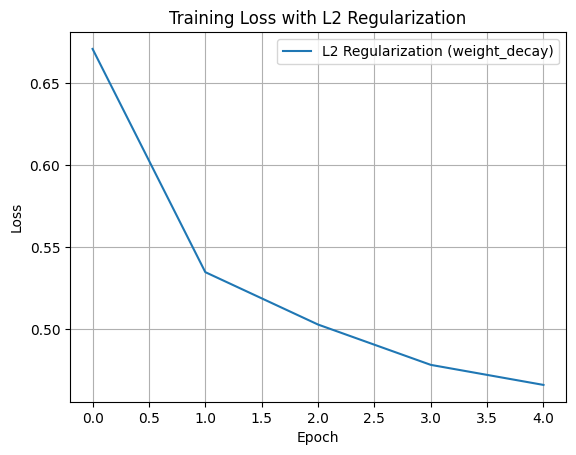


Training with L1 Regularization
Epoch [1/5], Loss: 4.9730
Epoch [2/5], Loss: 3.0170
Epoch [3/5], Loss: 3.0171
Epoch [4/5], Loss: 3.0170
Epoch [5/5], Loss: 3.0170


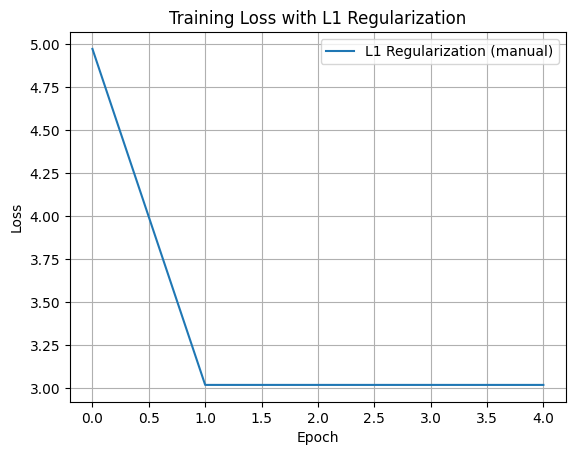


Evaluating model trained with L2 regularization:
Accuracy: 83.17%

Evaluating model trained with L1 regularization:
Accuracy: 10.00%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Data Import, Preparation, and Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 2. Defining the Neural Network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize the network
net = SimpleNet()

# 3. Define the loss function (Cross-Entropy Loss) and optimizer
criterion = nn.CrossEntropyLoss()

# L2 Regularization using weight_decay in the optimizer
optimizer_l2 = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization

# Function for training with L2 regularization (via weight_decay)
def train_with_l2_regularization(net, optimizer, criterion, num_epochs=5):
    print("\nTraining with L2 Regularization")
    train_losses = []

    for epoch in range(num_epochs):
        net.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()         # Zero gradients
            outputs = net(inputs)         # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()               # Backpropagation
            optimizer.step()              # Update weights
            running_loss += loss.item()

        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    return train_losses

# Train the model with L2 regularization
train_losses_l2 = train_with_l2_regularization(net, optimizer_l2, criterion, num_epochs=5)

# Plot the training loss for L2 regularization
plt.figure()
plt.plot(train_losses_l2, label='L2 Regularization (weight_decay)')
plt.title('Training Loss with L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 4. L1 Regularization Implementation (Manually Adding L1 to Loss)
l1_lambda = 0.01  # The strength of L1 regularization

# Function for training with manual L1 regularization
def train_with_l1_regularization(net, optimizer, criterion, l1_lambda, num_epochs=5):
    print("\nTraining with L1 Regularization")
    train_losses = []

    for epoch in range(num_epochs):
        net.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()         # Zero gradients
            outputs = net(inputs)         # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

            # Manually add L1 regularization (sum of absolute values of weights)
            l1_norm = sum(p.abs().sum() for p in net.parameters())
            loss = loss + l1_lambda * l1_norm  # Add L1 penalty to the loss

            loss.backward()               # Backpropagation
            optimizer.step()              # Update weights
            running_loss += loss.item()

        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    return train_losses

# Reinitialize the network for L1 training
net_l1 = SimpleNet()

# Define the optimizer without weight_decay for L1 (since we'll add L1 manually)
optimizer_l1 = optim.Adam(net_l1.parameters(), lr=0.001)

# Train the model with L1 regularization
train_losses_l1 = train_with_l1_regularization(net_l1, optimizer_l1, criterion, l1_lambda, num_epochs=5)

# Plot the training loss for L1 regularization
plt.figure()
plt.plot(train_losses_l1, label='L1 Regularization (manual)')
plt.title('Training Loss with L1 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 5. Model Evaluation
def evaluate_model(net, testloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

# Evaluate the model trained with L2 regularization
print("\nEvaluating model trained with L2 regularization:")
evaluate_model(net, testloader)

# Evaluate the model trained with L1 regularization
print("\nEvaluating model trained with L1 regularization:")
evaluate_model(net_l1, testloader)


## Experiments with all the optimizers from the pytorchs

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Data Import, Preparation, and Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 2. Defining the Neural Network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize the network
net = SimpleNet()

# 3. Define the loss function (Cross-Entropy Loss)
criterion = nn.CrossEntropyLoss()

# Dummy input and output (batch of 64 samples)
inputs = torch.randn(64, 28 * 28)  # Example input (flattened images)
labels = torch.randint(0, 10, (64,))  # Example output (random labels)

# 4. Optimizer Functions and Training Steps

# Function for training with a given optimizer
def train_model_with_optimizer(optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()         # Zero gradients
            outputs = net(input)         # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()               # Backpropagation
            optimizer.step()              # Update weights
            running_loss += loss.item()
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}")

# Define all optimizers
optimizers = {
    "SGD": optim.SGD(net.parameters(), lr=0.01, momentum=0.9),
    "Adam": optim.Adam(net.parameters(), lr=0.001),
    "RMSprop": optim.RMSprop(net.parameters(), lr=0.001, alpha=0.99),
    "Adagrad": optim.Adagrad(net.parameters(), lr=0.01),
    "Adadelta": optim.Adadelta(net.parameters(), rho=0.9),
    "AdamW": optim.AdamW(net.parameters(), lr=0.001, weight_decay=0.01),
    "NAG": optim.SGD(net.parameters(), lr=0.01, momentum=0.9, nesterov=True),
    "Adamax": optim.Adamax(net.parameters(), lr=0.002),
}

# Train with each optimizer
for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer")

    # Re-initialize the network and optimizer for each test
    net = SimpleNet()  # Re-initialize the model to avoid weight carryover
    optimizer = optimizers[opt_name]

    train_model_with_optimizer(optimizer, num_epochs=5)

# 5. Model Evaluation Function
def evaluate_model(net, testloader):
    net.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation for evaluation
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

# Evaluate the model trained with the last optimizer
print("\nEvaluating the model with the last optimizer")
evaluate_model(net, testloader)
